The dataset had total 9 attributes including the target attribute which is the rating for the chocolate. The problem statement is to classify the rating for the chocolated based on the value of the attributes. This problem was addressed as a classification problem since there were discrete values for the rating in the dataset. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv


First of all lets import the dataset into our notebook.

In [2]:
import pandas as pd
import numpy as np
# Importing the csv data files 
data = pd.read_csv('../input/chocolate-bar-ratings/flavors_of_cacao.csv',error_bad_lines=False, warn_bad_lines=True)
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


The name of the attributes(column names) are renamed to make it easier to work with. The main reason is that in the original dataset the column names were taking two rows which would make our references to those columns clumsy as we need to include '\n' for the column names 

In [3]:
# Renaming the column name
new_col_names = ['company', 'bean_origin', 'REF', 'review_date', 'cocoa_percent',
                'company_location', 'rating', 'bean_typ', 'country_origin']
data_clean = data.rename(columns=dict(zip(data.columns, new_col_names)))
data_clean.head()

,company,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_typ,country_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Some functions are being created so that we avoid repetation of the code and to make our code more succinct.

In [4]:
# Function to count the number of null values in a column
def count_null_values(dataset, column_list):
    for i in range (len(column_list)):
        print ("The total number of null values in :",column_list[i])
        print (dataset[column_list[i]].isnull().sum())
    return

# Function to dispplay the unique counts in a column
def print_uniques(dataset, column_list):
    for i in range (len(column_list)):
        print ("Unique values for the column:",column_list[i])
        print (dataset[column_list[i]].unique())
        print ('\n')
    return

# Printing the null and unique values for each attribute in the dataset
print_uniques(data_clean, data_clean.columns)
count_null_values(data_clean, data_clean.columns)
#print len(data['Rating'].unique().tolist())

Unique values for the column: company
['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 "Akesson's (Pralus)" 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA'
 'Anahata' 'Animas' 'Ara' 'Arete' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Askinosie' 'Bahen & Co.' 'Bakau'
 'Bar Au Chocolat' "Baravelli's" 'Batch' 'Beau Cacao' 'Beehive'
 'Belcolade' 'Bellflower' 'Belyzium' 'Benoit Nihant' 'Bernachon'
 'Beschle (Felchlin)' 'Bisou' 'Bittersweet Origins' 'Black Mountain'
 'Black River (A. Morin)' 'Blanxart' 'Blue Bandana' 'Bonnat'
 'Bouga Cacao (Tulicorp)' 'Bowler Man' "Brasstown aka It's Chocolate"
 'Brazen' 'Breeze Mill' 'Bright' 'Britarev' 'Bronx Grrl Chocolate'
 'Burnt Fork Bend' 'Cacao Arabuco' 'Cacao Atlanta' 'Cacao Barry'
 'Cacao de Origen' 'Cacao de Origin' 'Cacao Hunters' 'Cacao Market'
 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacaosuyo (Theobroma Inversiones)' 'Cacaoyere (Ecuatoria

### Conducting Feature Engineering

There were two attributes- Company(Maker-if known) and bean_typ which stored multiple infomation as a same instance value and thus required feature engineering so that we do not lose any valuable information during the data cleaning process. 

In [5]:
# Creating new column named maker 
data_clean['company_coffee'], data_clean['maker'] = data_clean['company'].str.split('(', 1).str
# Replacing the missing values with "Unknown"
print (data_clean.head(4))
data_clean['maker'].fillna(value='Unknown', inplace = True) 
#data_clean["maker"].replace(np.nan, "Unknown")
print (data_clean.head())
print (data_clean.info())
# Removing unwanted character
data_clean['maker'] = data_clean['maker'].apply(lambda x: x.split(')')[0])
# Dropping the original column
data_clean = data_clean.drop('company', 1)

print(data_clean.head(4))



    company  bean_origin   REF  review_date cocoa_percent company_location  \
0  A. Morin  Agua Grande  1876         2016           63%           France   
1  A. Morin        Kpime  1676         2015           70%           France   
2  A. Morin       Atsane  1676         2015           70%           France   
3  A. Morin        Akata  1680         2015           70%           France   

   rating bean_typ country_origin company_coffee maker  
0    3.75                Sao Tome       A. Morin   NaN  
1    2.75                    Togo       A. Morin   NaN  
2    3.00                    Togo       A. Morin   NaN  
3    3.50                    Togo       A. Morin   NaN  
    company  bean_origin   REF  review_date cocoa_percent company_location  \
0  A. Morin  Agua Grande  1876         2016           63%           France   
1  A. Morin        Kpime  1676         2015           70%           France   
2  A. Morin       Atsane  1676         2015           70%           France   
3  A. Morin 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [6]:
# Converting the string values to lower case
data_clean['bean_typ'] = data_clean['bean_typ'].str.lower()

# Creating new column named sub_bean_type 
data_clean['bean_type'], data_clean['sub_bean_type'] = data_clean['bean_typ'].str.split(',', 1).str
# Replacing the missing values with "Unknown"
data_clean["sub_bean_type"].fillna("unknown", inplace = True) 
# Removing unwanted character
data_clean['sub_bean_type'] = data_clean['sub_bean_type'].apply(lambda x: x.split(')')[0])
# Dropping the original column
data_clean = data_clean.drop('bean_typ', 1)

print (data_clean.head(10))
print (data_clean['bean_type'].unique())

      bean_origin   REF  review_date cocoa_percent company_location  rating  \
0     Agua Grande  1876         2016           63%           France    3.75   
1           Kpime  1676         2015           70%           France    2.75   
2          Atsane  1676         2015           70%           France    3.00   
3           Akata  1680         2015           70%           France    3.50   
4          Quilla  1704         2015           70%           France    3.50   
5        Carenero  1315         2014           70%           France    2.75   
6            Cuba  1315         2014           70%           France    3.50   
7    Sur del Lago  1315         2014           70%           France    3.50   
8  Puerto Cabello  1319         2014           70%           France    3.75   
9         Pablino  1319         2014           70%           France    4.00   

  country_origin company_coffee    maker bean_type sub_bean_type  
0       Sao Tome       A. Morin  Unknown                 unknow

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


### Conducting Data Cleaning

In the data cleaning stage the anomalies in the data were resolved

In [7]:
# Some data cleaning regarding bean type name
data_clean['bean_type'] = data_clean['bean_type'].replace('forastero (arriba) asss', 'forastero (arriba)')
data_clean['bean_type'] = data_clean['bean_type'].replace('forastero (arriba) ass', 'forastero (arriba)')
print (data_clean['bean_type'].unique())

['\xa0' 'criollo' 'trinitario' 'forastero (arriba)' 'forastero'
 'forastero (nacional)' 'criollo (porcelana)' 'blend'
 'trinitario (85% criollo)' 'forastero (catongo)' 'forastero (parazinho)'
 'ccn51' 'criollo (ocumare)' 'nacional' 'criollo (ocumare 61)'
 'criollo (ocumare 77)' 'criollo (ocumare 67)' 'criollo (wild)' 'beniano'
 'amazon mix' 'amazon' 'eet' 'blend-forastero' 'trinitario (scavina)'
 'matina' 'forastero(arriba' 'nacional (arriba)' 'forastero (amelonado)'
 nan 'trinitario (amelonado)' 'criollo (amarru)']


In [8]:
# Data cleaning regarding the Broad Bean Origin column
print ("Before Cleaning country_origin column: ")
print (data_clean['country_origin'].unique())
data_clean['country_origin'] = data_clean['country_origin'].replace('Domincan Republic', 'Dominican Republic')
data_clean['country_origin'] = data_clean['country_origin'].replace('Carribean(DR/Jam/Tri)', 'Carribean')
data_clean['country_origin'] = data_clean['country_origin'].replace('Trinidad-Tobago', 'Trinidad, Tobago')
data_clean['country_origin'] = data_clean['country_origin'].replace("Peru, Mad., Dom. Rep.", "Peru, Madagascar, Dominican Republic")
data_clean['country_origin'] = data_clean['country_origin'].replace("Central and S. America", "Central and South America")
data_clean['country_origin'] = data_clean['country_origin'].replace("PNG, Vanuatu, Mad", "Papua New Guinea, Vanuatu, Madagascar")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven., Trinidad, Mad.", "Venezuela, Trinidad, Madagascar")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven.,Ecu.,Peru,Nic.", "Venezuela, Ecuador, Peru, Nicaragua")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven, Trinidad, Ecuador","Venezuela, Trinidad, Ecuador")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ghana, Domin. Rep", "Ghana, Dominican Republic")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ecuador, Mad., PNG","Ecuador, Madagascar, Papua New Guinea")
data_clean['country_origin'] = data_clean['country_origin'].replace("Mad., Java, PNG","Madagascar, Java, Papua New Guinea")
data_clean['country_origin'] = data_clean['country_origin'].replace("Gre., PNG, Haw., Haiti, Mad", "Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar")

print ("After Cleaning country_origin column: ")
print (data_clean['country_origin'].unique())

Before Cleaning country_origin column: 
['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba' 'Panama' 'Madagascar'
 'Brazil' 'Ecuador' 'Colombia' 'Burma' 'Papua New Guinea' 'Bolivia' 'Fiji'
 'Mexico' 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Tanzania'
 'Dominican Republic' 'Ghana' 'Belize' '\xa0' 'Jamaica' 'Grenada'
 'Guatemala' 'Honduras' 'Costa Rica' 'Domincan Republic' 'Haiti' 'Congo'
 'Philippines' 'Malaysia' 'Dominican Rep., Bali'
 'Venez,Africa,Brasil,Peru,Mex' 'Gabon' 'Ivory Coast' 'Carribean'
 'Sri Lanka' 'Puerto Rico' 'Uganda' 'Martinique' 'Sao Tome & Principe'
 'Vanuatu' 'Australia' 'Liberia' 'Ecuador, Costa Rica' 'West Africa'
 'Hawaii' 'St. Lucia' 'Cost Rica, Ven' 'Peru, Madagascar'
 'Venezuela, Trinidad' 'Trinidad, Tobago' 'Ven, Trinidad, Ecuador'
 'South America, Africa' 'India' 'Africa, Carribean, C. Am.' 'Tobago'
 'Ven., Indonesia, Ecuad.' 'Trinidad-Tobago' 'Peru, Ecuador, Venezuela'
 'Venezuela, Dom. Rep.' 'Colombia, Ecuador' 'Solomon Islands' 'Nigeria'
 'Peru, Belize' 'Pe

In [9]:
# Data cleaning the bean origin column

data_clean['bean_origin'] = data_clean['bean_origin'].str.lower()

data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split(',')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('/')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('*')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('.')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('+')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split(';')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('-')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('(')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('#')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('1')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('2')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('3')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('4')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('5')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('6')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('7')[0])
print (data_clean['bean_origin'].unique())
#print data_clean['bean_origin'].head()

['agua grande' 'kpime' 'atsane' 'akata' 'quilla' 'carenero' 'cuba'
 'sur del lago' 'puerto cabello' 'pablino' 'panama' 'madagascar' 'brazil'
 'equateur' 'colombie' 'birmanie' 'papua new guinea' 'chuao' 'piura'
 'chanchamayo province' 'bolivia' 'peru' 'chulucanas' 'tumbes'
 'vanua levu' 'los rios' 'tabasco' 'bali ' 'monte alegre' 'trinite'
 'vietnam' 'winak coop' 'la dalia' 'tien giang' 'makwale village'
 'momotombo' 'acopagro' 'ciaab coop' 'villa andina' 'gruppo salinas'
 'conacado' 'morobe' 'dos rios' 'guayas' 'montanya' 'bali' 'cuyagua'
 'ocumare' 'ghana' 'ecuador' 'lamasdelchanka' 'bellavista gran pajeten'
 'belize' 'dominican republic' 'venezuela' 'porcelana' 'nine' 'jamaica'
 'grenada' 'trinidad' 'toscano black' 'catongo' 'elvesia' 'alto beni'
 'chiapas' 'trincheras' 'san juan' 'kokoa kamili' 'hacienda victoria'
 'costa esmeraldas' 'lachua' 'rugoso' 'la masica' 'coto brus' 'phantom'
 'matasawalevu' 'lam dong' 'fazenda camboa' 'nacional' 'puerto quito'
 'oko caribe' 'maya mountain'

Previously we have seen that cocoa_percent attribute had the data type of object which was then tranfomed into integer 

In [10]:
# Converting cocoa_percent to numeric

print (data_clean.info())
data_clean['cocoa_percent'] = data_clean['cocoa_percent'].apply(lambda x: x.split('%')[0])
data_clean['cocoa_percent'] = pd.to_numeric(data_clean['cocoa_percent'], errors='coerce')
print (data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bean_origin       1795 non-null   object 
 1   REF               1795 non-null   int64  
 2   review_date       1795 non-null   int64  
 3   cocoa_percent     1795 non-null   object 
 4   company_location  1795 non-null   object 
 5   rating            1795 non-null   float64
 6   country_origin    1794 non-null   object 
 7   company_coffee    1795 non-null   object 
 8   maker             1795 non-null   object 
 9   bean_type         1794 non-null   object 
 10  sub_bean_type     1795 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 154.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bean_or

In the dataset there were some special character epresent due to encoding such as '\xa0'. This characters were replaced with null

In [11]:
# Replacing the empty cells with null
data_clean = data_clean.replace('\xa0', np.nan)
count_null_values(data_clean, data_clean.columns)

The total number of null values in : bean_origin
0
The total number of null values in : REF
0
The total number of null values in : review_date
0
The total number of null values in : cocoa_percent
0
The total number of null values in : company_location
0
The total number of null values in : rating
0
The total number of null values in : country_origin
74
The total number of null values in : company_coffee
0
The total number of null values in : maker
0
The total number of null values in : bean_type
888
The total number of null values in : sub_bean_type
0


In [12]:
# Changing the type for review_date from int to object
data_clean['review_date'] = data_clean['review_date'].astype(str)
data_clean['rating'] = data_clean['rating'].astype(str)
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bean_origin       1795 non-null   object 
 1   REF               1795 non-null   int64  
 2   review_date       1795 non-null   object 
 3   cocoa_percent     1795 non-null   float64
 4   company_location  1795 non-null   object 
 5   rating            1795 non-null   object 
 6   country_origin    1721 non-null   object 
 7   company_coffee    1795 non-null   object 
 8   maker             1795 non-null   object 
 9   bean_type         907 non-null    object 
 10  sub_bean_type     1795 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 154.4+ KB
None


### Data Preprocessing

In this dataset there were two numerical attributes which required scaling so that during training the machine learning model does not learn more from the attribute with the higher values when compared to the attribute with the low values.

In [13]:
# Normalizing the column with integer type

# Data Normalizing
from sklearn.preprocessing import StandardScaler 
data_norm = data
scaler_z = StandardScaler()
# Only the columns with integer and float type values are normalized
num_d = data_clean.select_dtypes(exclude=['object'])
data_clean[num_d.columns] = scaler_z.fit(num_d).transform(num_d)

# Getting information of the dataset after normalization
print (data_clean.head(10))
print (data_clean[num_d.columns].mean(axis= 0))
print (data_clean.info())

      bean_origin       REF review_date  cocoa_percent company_location  \
0     agua grande  1.519895        2016      -1.376022           France   
1           kpime  1.158056        2015      -0.268665           France   
2          atsane  1.158056        2015      -0.268665           France   
3           akata  1.165293        2015      -0.268665           France   
4          quilla  1.208714        2015      -0.268665           France   
5        carenero  0.504937        2014      -0.268665           France   
6            cuba  0.504937        2014      -0.268665           France   
7    sur del lago  0.504937        2014      -0.268665           France   
8  puerto cabello  0.512174        2014      -0.268665           France   
9         pablino  0.512174        2014      -0.268665           France   

  rating country_origin company_coffee    maker bean_type sub_bean_type  
0   3.75       Sao Tome       A. Morin  Unknown       NaN       unknown  
1   2.75           Togo   

### Dealing with the null values for country_origin

The attibutes with the null values were both categorical. In order to replace the missing values a KNN model was developed to predict the missing values. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Creating a temp dataset
temp_data_co = data_clean
# dropping the bean_type column since it has missing values
temp_data_co= temp_data_co.drop('bean_type', 1)

# Splitting the dataset into null and not null dataframe
test_data_co = temp_data_co[temp_data_co["country_origin"].isnull()]
train_data_co = temp_data_co[temp_data_co["country_origin"].notnull()]

# Label encoding only the categorical columns 
test_data_co_l = test_data_co.apply(LabelEncoder().fit_transform)
test_data_co_l['REF'] = data_clean['REF']
test_data_co_l['cocoa_percent'] = data_clean['cocoa_percent']

train_data_co_l = train_data_co.apply(LabelEncoder().fit_transform)
train_data_co_l ['REF'] = data_clean['REF']
train_data_co_l['cocoa_percent'] = data_clean['cocoa_percent']

# Defining the X and y 
X = train_data_co_l.drop('country_origin', axis=1).values
y = train_data_co_l['country_origin'].values

print (test_data_co.shape, train_data_co.shape)

X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X, y, test_size= 0.1, train_size=0.9, random_state=42)

print (X_train_co.shape, X_test_co.shape)

# Training a KNN machine leanring model to replace the missing values
from sklearn.neighbors import KNeighborsClassifier
# The model gave the best result at n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_co, y_train_co)
y_pred = knn.predict(X_test_co)
print (y_pred)
print (y_pred.size)

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test_co)
pre = precision_score(y_pred, y_test_co, average='micro')
rec = recall_score(y_pred, y_test_co, average='micro')
f1 = f1_score(y_pred, y_test_co, average='micro')

print ('Model performace for replacing the missing values: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

(74, 10) (1721, 10)
(1548, 9) (173, 9)
[ 3 19 48 42 84  9  9  3 18 51 84  3 19 80 84 42  2 42 19 19 18 11 53 76
  2 19  4 42 51  2 53 18 14 19 42 53 63 19 13 18 18 42 79 18 18  3 18 66
 47  3 42 19 37 18  4 19 42 42  9 19 37 42 84 19 11 42  4 10 42 19 34 94
  3 19 84 13 19 84 53 18 15 25 84 51 29 48 42 18 18 19  9 34 18  4 42 32
 48  4 19 84 53 18 19 61 18 32 84 48 42 19 18 18 18 18 73 18 42 32 18 84
 19  9 42 42 53 84 84 94 10 42 53 94 19 13 29 84 34 84  2  3 34  4 42 32
 18  4 48 13 18 84 13 48 34 14 19  4 13 61  7  3  4  3 53 13  2 18 42 35
  2 18 29 19 19]
173
Model performace for replacing the missing values: 
Accuracy:  0.34104046242774566
Precision:  0.34104046242774566
Recall:  0.34104046242774566
F1 Score:  0.34104046242774566


In [15]:
# Predicting the null values for country_origin
pred_data_co_l = test_data_co_l.drop('country_origin', axis=1).values

# y_pred containing the predicted value
y_pred = knn.predict(pred_data_co_l)

# Storing the y_pred values in a column of a dataframe
temp1 = test_data_co_l
temp1["country_origin"] = y_pred

# Incrporating the prediction for the missing values into the main dataset
dataset_clean_co = pd.concat([train_data_co_l, temp1], join = 'inner')
print (dataset_clean_co.head())
print (dataset_clean_co.shape)

   bean_origin       REF  review_date  cocoa_percent  company_location  \
0           12  1.519895           10      -1.376022                18   
1          298  1.158056            9      -0.268665                18   
2           49  1.158056            9      -0.268665                18   
3           13  1.165293            9      -0.268665                18   
4          466  1.208714            9      -0.268665                18   

   rating  country_origin  company_coffee  maker  sub_bean_type  
0      10              65               0     34              9  
1       6              75               0     34              9  
2       7              75               0     34              9  
3       9              75               0     34              9  
4       9              53               0     34              9  
(1795, 10)


### Dealing with the null values for bean_type

In [16]:
# Preparing the dataset by propping the country_origin column since it had missing values
temp_data_bt = data_clean
temp_data_bt = temp_data_bt.drop('country_origin', 1)

# Splitting the dataset into null and not null dataframe
test_data_bt = temp_data_bt[temp_data_bt["bean_type"].isnull()]
train_data_bt = temp_data_bt[temp_data_bt["bean_type"].notnull()]

# Label encoding only the categorical columns 
test_data_bt = test_data_bt.apply(LabelEncoder().fit_transform)
test_data_bt['REF'] = data_clean['REF']
test_data_bt['cocoa_percent'] = data_clean['cocoa_percent']

train_data_bt = train_data_bt.apply(LabelEncoder().fit_transform)
train_data_bt['cocoa_percent'] = data_clean['cocoa_percent']
train_data_bt['REF'] = data_clean['REF']

# Defining the X and y 
X = train_data_bt.drop('bean_type', axis=1).values
y = train_data_bt['bean_type'].values

X_train_bt, X_test_bt, y_train_bt, y_test_bt = train_test_split(X, y, test_size= 0.2, train_size=0.8, random_state=42)


# Training a KNN machine leanring model to replace the missing values
from sklearn.neighbors import KNeighborsClassifier
# The model gave the best result at n_neighbors = 80
knn = KNeighborsClassifier(n_neighbors = 80)
knn.fit(X_train_bt, y_train_bt)
y_pred = knn.predict(X_test_bt)

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test_bt)
pre = precision_score(y_pred, y_test_bt, average='micro')
rec = recall_score(y_pred, y_test_bt, average='micro')
f1 = f1_score(y_pred, y_test_bt, average='micro')

print ('Model performace for replacing the missing values: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

Model performace for replacing the missing values: 
Accuracy:  0.5054945054945055
Precision:  0.5054945054945055
Recall:  0.5054945054945055
F1 Score:  0.5054945054945055


In [17]:
# Predicting the null values for bean_type with the KNN model

pred_data_bean_l = test_data_bt.drop('bean_type', axis=1).values

# y_pred storing the predicted values
y_pred = knn.predict(pred_data_bean_l)

temp = test_data_bt
temp["bean_type"] = y_pred

# Incrporating the prediction for the missing values into the dataset
dataset_clean_bean = pd.concat([train_data_bt, temp], join = 'inner')
print (dataset_clean_bean.head())
print (dataset_clean_bean.shape)

    bean_origin       REF  review_date  cocoa_percent  company_location  \
5            65  0.504937            8      -0.268665                16   
7           300  0.504937            8      -0.268665                16   
8           257  0.512174            8      -0.268665                16   
11          186 -0.045057            7      -0.268665                16   
17           73 -0.037821            7      -0.268665                16   

    rating  company_coffee  maker  bean_type  sub_bean_type  
5        6               0     26          6              9  
7        9               0     26          6              9  
8       10               0     26          6              9  
11       7               0     26          6              9  
17      11               0     26         25              9  
(1795, 10)


### Preparing the final dataset

In [18]:
data_clean_label_encoding = dataset_clean_bean
data_clean_label_encoding['country_origin'] = dataset_clean_co['country_origin']
# Checking the dataset for null values after data processing
count_null_values(data_clean_label_encoding, data_clean_label_encoding.columns)


The total number of null values in : bean_origin
0
The total number of null values in : REF
0
The total number of null values in : review_date
0
The total number of null values in : cocoa_percent
0
The total number of null values in : company_location
0
The total number of null values in : rating
0
The total number of null values in : company_coffee
0
The total number of null values in : maker
0
The total number of null values in : bean_type
0
The total number of null values in : sub_bean_type
0
The total number of null values in : country_origin
0


### Exploratory Data Analysis

Let's explore the correlation between the categorical values. This will give us a better understanding of how the attributes are related to one another.

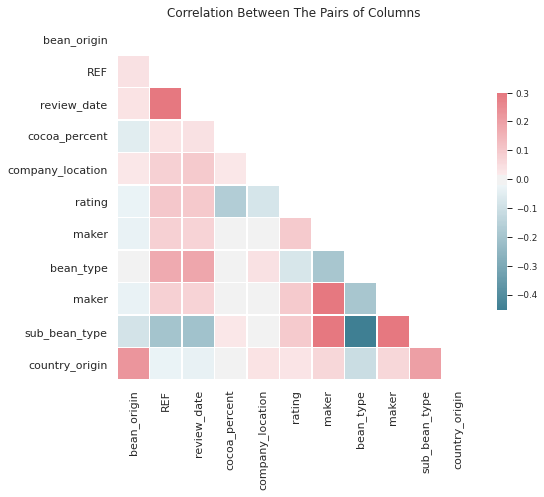

In [19]:
# Finding out the correlation between the features in the dataset

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

sns.set(style="white")

# Compute the correlation matrix
corr = data_clean_label_encoding [['bean_origin','REF','review_date','cocoa_percent','company_location'\
                   ,'rating','maker','bean_type','maker', 'sub_bean_type',\
                   'country_origin']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12}) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Between The Pairs of Columns ')
plt.show()

Analysing the correlation matrix shown above we can notice that there are some high correlation between the attributes which means some of the attributes will not provide significant input to our machine leanring model. Moreover, there is a risk of having an overfitted model due to the presence of high correlation. This issue has been addressed by feature selection; discussed in the later part of the implementation.

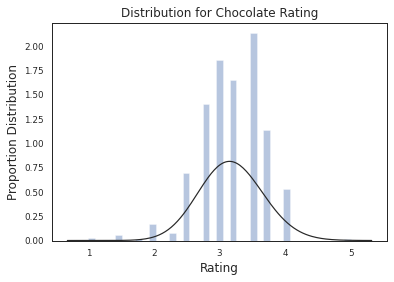

In [20]:
# Finding the distribution of rating in the dataset
from scipy import stats
sns.distplot(data_clean["rating"], kde=False, fit=stats.gamma).set(title = 'Distribution for Chocolate Rating', xlabel = 'Rating', ylabel = 'Proportion Distribution' )
plt.show()

The graph above shows the distribution of rating in the dataset. We can see that the pattern follows a normal distribution with having the peak rating around the value of 3

### Performing Feature Selection

(1795, 10)
(1795,)
bean_origin         11042.111897
REF                     1.000557
review_date             8.568560
cocoa_percent           1.000557
company_location      276.440396
company_coffee       7412.665802
maker                  25.088949
bean_type              52.561987
sub_bean_type          19.782157
country_origin        756.534029
dtype: float64
Dataset Size Before Feature Selection 
(1795, 10)
Dataset Size After Feature Selection 
(1795, 5)
Relative Feature importance for each of the Features- 
[0.15698349 0.16832455 0.07789514 0.14840128 0.09184565 0.14007481
 0.0358967  0.03814488 0.01710638 0.12532712]


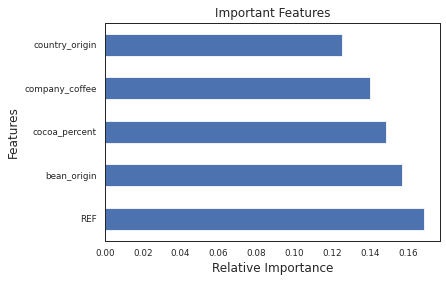

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
#Splitting the variables into features and target
X = data_clean_label_encoding.drop('rating', axis=1)
y = data_clean_label_encoding['rating'].values

print(X.shape)#printing dimensions of features
print(y.shape)#printing dimensions of label

#Printing the variability of all the features
print(X.var())
#Since the Variability of any column is not very low so selecting all the features based on variability


# Using ExtraTreesClassifier for feature selection
model = ExtraTreesClassifier()
model.fit(X,y)
print ("Dataset Size Before Feature Selection ")
print( X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_feat_select = model.transform(X)
print ("Dataset Size After Feature Selection ")
print (X_feat_select.shape )           
print ("Relative Feature importance for each of the Features- ")
print(clf.feature_importances_)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


After applying feature selection we ended up with 5 features down from 10.

### Performing Data Partitioning

In [22]:
# Training- 80% Testing- 20%
X_train, X_test, y_train, y_test = train_test_split(X_feat_select, y, test_size= 0.2, random_state=42)
print ('Training and testing size')
print (X_train.shape)
print (X_test.shape)

Training and testing size
(1436, 5)
(359, 5)


### Random Forest Model Development

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
# Parameter for performing hyper tuning
parameters = {'n_estimators': [4, 5, 6], 'max_depth': [2, 3, 4], \
              'min_samples_split': [25, 30, 35], 'max_leaf_nodes': [4, 5, 6]}

random_forest_classifier = GridSearchCV(random_forest, parameters,  cv = 5)
random_forest_classifier.fit(X_train, y_train)
print(random_forest_classifier.best_params_)
print(random_forest_classifier.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 35, 'n_estimators': 5}
0.25695896244676736


The best test accuracy for the Random forest model is 25% which is very less as it can be interpreted as- The model will be able to predict the rating for the chocolate correctly once in every four attempts. However, this problem is a multiclass classification problem with 13 distinct values for the rating  which are- 3.75, 2.75, 3, 3.5, 4, 3.25, 2.5, 5, 1.75, 1.5, 2.25, 2, 1

### Rounding the values of rating

We can increase the prediction of the model if we round the values for the ratings to its nearest whole number

In [24]:

temp = data_clean
temp['rating'] = temp['rating'].astype(float)

# Function to convert the values for the  rating to its nearest whole number
def round_rating(rating):
    if (rating < 1 ):
        return 0
    elif (rating > 0 ) and (rating < 2 ):
        return 1
    elif (rating >= 2 ) and (rating < 3 ):
        return 2
    elif (rating >= 3 ) and (rating < 4 ):
        return 3
    elif (rating >= 4 ) and (rating < 5 ):
        return 4
    else:
        return 5


temp['rating'] = temp['rating'].apply(round_rating)
print(temp['rating'].unique())

[3 2 4 5 1]


In [25]:
y_new = temp['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X_feat_select, y_new, test_size= 0.2, random_state=42)
print ('Suite-1 training and testing size')
print (X_train.shape)
print (X_test.shape)
print(y_new)

Suite-1 training and testing size
(1436, 5)
(359, 5)
[3 2 3 ... 3 3 3]


In [26]:
# Training the model
random_forest_classifier.fit(X_train, y_train)
print(random_forest_classifier.best_params_)
print(random_forest_classifier.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 25, 'n_estimators': 4}
0.6922014130855595


In [27]:
# Testing the model
model = RandomForestClassifier(random_state=42, max_depth= 4, max_leaf_nodes= 4,\
                                       min_samples_split= 35, n_estimators= 6)
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test, average='micro')
rec = recall_score(y_pred, y_test,average='micro')
f1 = f1_score(y_pred, y_test, average='micro')
print ('Model Performance Statistic: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

Model Performance Statistic: 
Accuracy:  0.7075208913649025
Precision:  0.7075208913649025
Recall:  0.7075208913649025
F1 Score:  0.7075208913649025


The accuracy of the model is now 70.75%